# importing libraries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt


# setting up the files path 
- to be able to import the modules in the script folder

In [67]:
import sys
from pathlib import Path

scripts_path = Path('../scripts')  
sys.path.append(str(scripts_path))

## importing the module

In [68]:
from ingestion import PostgreSQLConnection

## setting up the connection

In [69]:
db_config = {
        'dbname': 'digital_store_DWH',
        'user': 'postgres',
        'password': '123', # User postgres password
        'host': 'localhost',
        'port': 5432
    }
db_connection = PostgreSQLConnection(**db_config)
db_connection.connect()

Connected to the digital_store_DWH database!


#  getting **Revenue by month**

In [70]:
# use db_connection.execute_extract_query(---#add your query here-----)
# then transform it into a Pandas DataFrame!
MonthlyRevenue= db_connection.execute_extract_query(
"""SELECT DATE_TRUNC('month', invoice_date) AS Month, SUM(total) AS MonthlyRevenue
FROM dw_schema.invoice_details
GROUP BY Month
ORDER BY Month;""")
MonthlyRevenue=pd.DataFrame(MonthlyRevenue,columns=['month','MonthlyRevenue'])
MonthlyRevenue.head()

,month,MonthlyRevenue
0,2021-01-01,35.64
1,2021-02-01,37.62
2,2021-03-01,37.62
3,2021-04-01,37.62
4,2021-05-01,37.62


## transforming the data for plotting

In [71]:
MonthlyRevenue = MonthlyRevenue.set_index('month')
MonthlyRevenue.index = MonthlyRevenue.index.strftime('%Y-%m')
MonthlyRevenue['MonthlyRevenue'] = pd.to_numeric(MonthlyRevenue['MonthlyRevenue'], errors='coerce')
MonthlyRevenue.head()


,MonthlyRevenue
month,
2021-01,35.64
2021-02,37.62
2021-03,37.62
2021-04,37.62
2021-05,37.62


In [72]:
print(MonthlyRevenue.dtypes)

MonthlyRevenue    float64
dtype: object


## Monthly Revenue plot

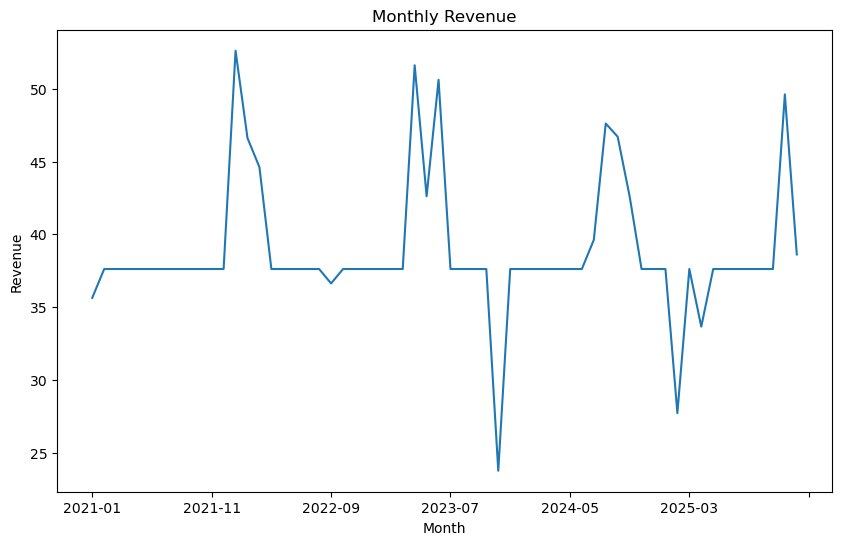

In [73]:
MonthlyRevenue['MonthlyRevenue'].plot(figsize=(10, 6), title='Monthly Revenue', legend=False)

plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue')

plt.show()